In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("heart_failure_clinical_records.csv")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
## What is the distribution of age among heart failure patients in the dataset

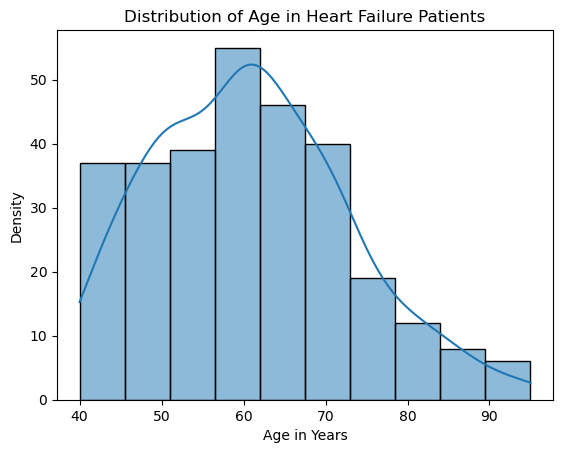

In [8]:
sns.histplot(df['age'], kde = True)
plt.xlabel("Age in Years")
plt.ylabel("Density")
plt.title("Distribution of Age in Heart Failure Patients")
plt.show()

Insights : Most of the Heart Failure Patients are in 55-65 years age category

In [9]:
## 1.  How does the death rate vary with age

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


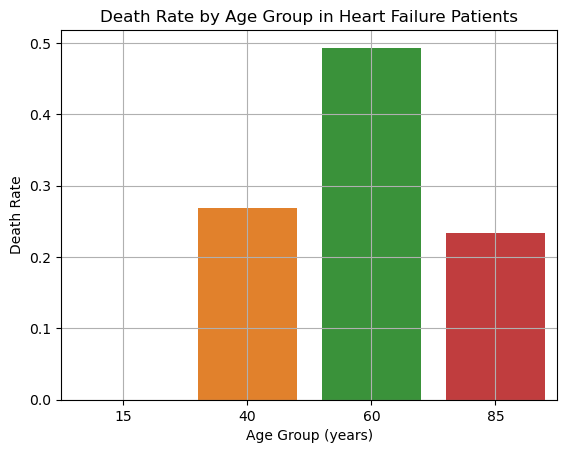

In [10]:
## First we need to create age groups with help of cut function

age_groups = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], right = False, labels = [15, 40, 60, 85])

## Caluclate death rates in age groups in groupby
death_rates = df.groupby(age_groups)["DEATH_EVENT"].mean()
sns.barplot(x = age_groups, y = death_rates)
plt.xlabel("Age Group (years)")
plt.ylabel("Death Rate")
plt.title("Death Rate by Age Group in Heart Failure Patients")
plt.grid(True)
plt.show()



Insights : Death Rate is higher in 50-70 years cateogry

In [11]:
## What is the percentage of male and female patients in the dataset? 0 for female, 1 for male

In [12]:
df = pd.read_csv("heart_failure_clinical_records.csv")

In [13]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [14]:
Total_Count = df.shape[0]
print("the total count of the the datset is ", Total_Count)
Male_Count = df[df['sex'] == 1].shape[0]
Female_Count = df[df['sex'] == 0].shape[0]
Male_Perc = (Male_Count / Total_Count) * 100
Female_Perc = (Female_Count / Total_Count) * 100

print("the male percentage in the dataser is ", round(Male_Perc,2))
print("the female percentage in the dataset is ", round(Female_Perc,2))


the total count of the the datset is  299
the male percentage in the dataser is  64.88
the female percentage in the dataset is  35.12


In [15]:
## How does the platlet count vary among different age groups?


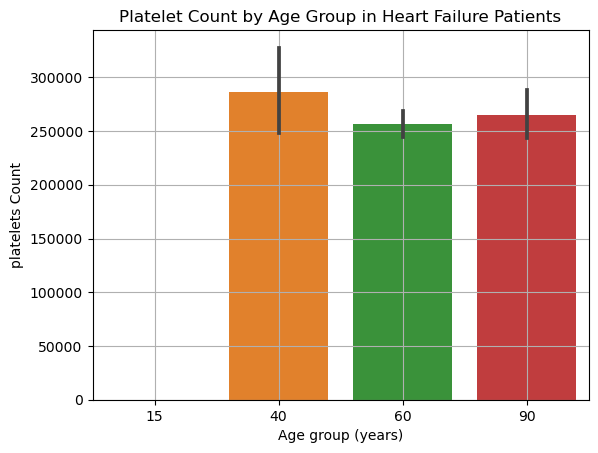

In [16]:
age_groups = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], right = False, labels = [15, 40, 60, 90])

sns.barplot(x = age_groups, y = df.platelets)

plt.xlabel("Age group (years)")
plt.ylabel("platelets Count")
plt.title("Platelet Count by Age Group in Heart Failure Patients")
plt.grid(True)
plt.show()


Insights : Platelets counts are higher in 30-50 age group followed by 80-100 age group

In [17]:
## > Is there a correlation between creatinine and sodium levels in the blood?


In [18]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [19]:
## First we will check if there is any misisng value for 

In [20]:
df['serum_creatinine'].isnull().sum()

0

In [21]:
df['serum_sodium'].isnull().sum()

0

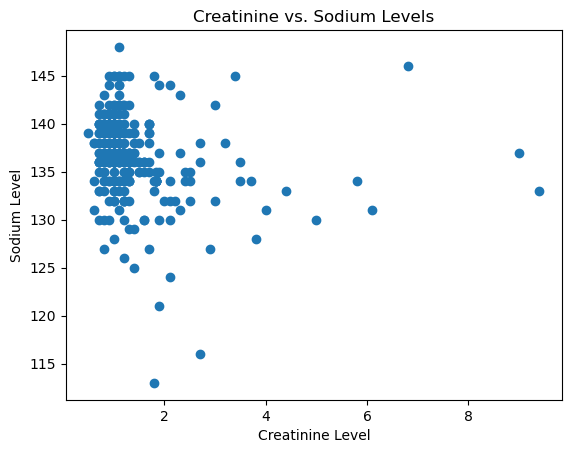

In [22]:
plt.scatter(df['serum_creatinine'], df['serum_sodium'])

plt.xlabel('Creatinine Level')
plt.ylabel('Sodium Level')
plt.title('Creatinine vs. Sodium Levels')
plt.show()

In [23]:
Correlation = df['serum_creatinine'].corr(df['serum_sodium'])

In [24]:
Correlation

-0.1890952100911741

Insights : There is negative correleation between creatinine and sodium levels in the blood as per data provided 

In [25]:
# How the prevalence of high blood pressure differ between male and female patients

In [26]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [27]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [28]:
df[df['sex'] == 1][df['high_blood_pressure'] == 1].shape

/tmp/ipykernel_70/4172380145.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['sex'] == 1][df['high_blood_pressure'] == 1].shape


(61, 13)

In [29]:
df[df['sex'] == 0][df['high_blood_pressure'] == 1].shape ## 0 is mentioned for female

/tmp/ipykernel_70/631542885.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['sex'] == 0][df['high_blood_pressure'] == 1].shape ## 0 is mentioned for female


(44, 13)

Conclusion : Total there were 61 males having high blood pressure and 44 females having high blood pressure

In [30]:
## Relationship between smoking habits and occurances of Heart Failure

In [31]:
df[df['DEATH_EVENT'] == 1].shape

(96, 13)

So total 96 people were died

In [32]:
## Finding number of people who were smokers and had heath failure

df[df['smoking'] == 1][df['DEATH_EVENT'] == 1].shape

/tmp/ipykernel_70/1969105724.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoking'] == 1][df['DEATH_EVENT'] == 1].shape


(30, 13)

In [33]:
## Finding number of people who were non - smokers and had heath failure
df[df['smoking'] == 0][df['DEATH_EVENT'] == 1].shape

/tmp/ipykernel_70/132345238.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoking'] == 0][df['DEATH_EVENT'] == 1].shape


(66, 13)

In [34]:
Correlation = df['smoking'].corr(df['DEATH_EVENT'])
Correlation



-0.012623152709359643

There is a negative correlation in smoking and Heart Failure but it will not provide perfect relationship between smoking habits and occurances of Heart Failure

In [35]:
## Are there any noteceable patterns in the distribution of death events across different age groups?

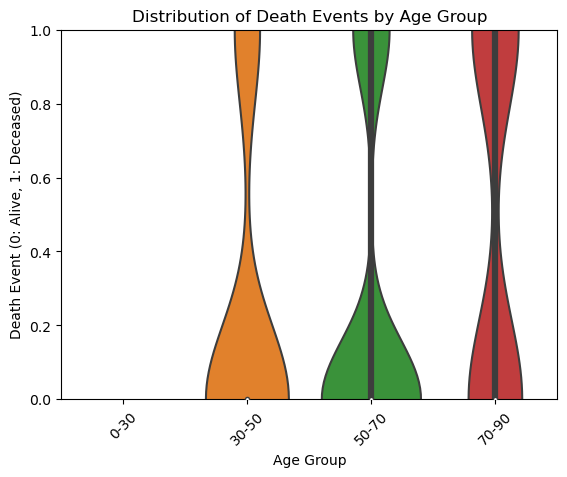

In [36]:
## Age Group Calculation

## Creation of age groups

##Bin patients into age groups
df['age_groups'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 90], right = False, labels = ['0-30', '30-50', '50-70', '70-90'])

sns.violinplot(x = df['age_groups'], y = 'DEATH_EVENT', showmeans = True, data = df)
plt.xlabel("Age Group")
plt.ylabel("Death Event (0: Alive, 1: Deceased)")  # Clarify y-axis labels
plt.title("Distribution of Death Events by Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1) 
plt.show()


In [37]:
df[df['DEATH_EVENT'] == 1]['age_groups'].value_counts()

50-70    47
70-90    33
30-50    11
0-30      0
Name: age_groups, dtype: int64

Insights : From above Violin plot, the width of the curve around 50-70 age group is largest , so most of the data points are concentrated over there and we are getting highest counts of Heart Failure in this age-group only

In [38]:
##  Is there any significant difference in ejection fraction between patient with and without diabities?



In [39]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_groups
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70-90
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50-70
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,50-70
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50-70
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,50-70


In [40]:
##Calulatiing number of people and ejection fraction value for the people having diabetes

df[df['diabetes'] == 1]['ejection_fraction']

4      20
7      60
19     55
21     30
23     60
       ..
290    55
292    38
293    35
294    38
296    60
Name: ejection_fraction, Length: 125, dtype: int64

In [41]:
##Calulatiing number of people and ejection fraction value for the people not having diabetes
df[df['diabetes'] == 0]['ejection_fraction']


0      20
1      38
2      20
3      20
5      40
       ..
289    38
291    35
295    38
297    38
298    45
Name: ejection_fraction, Length: 174, dtype: int64

In [42]:
df.head(12)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_groups
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70-90
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50-70
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,50-70
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50-70
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,50-70
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1,NaN
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1,70-90
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1,50-70
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1,50-70
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1,70-90


In [43]:
df[df['diabetes'] == 1]['ejection_fraction'].mean()

38.016

In [44]:
df[df['diabetes'] == 0]['ejection_fraction'].mean()

38.132183908045974

Conclusion : The mean ejection_fraction value for the people having Diabetes and withou diabetes is bear bout same which is 38. So there is no significant difference in ejection fraction in both categories

In [45]:
## How does the serum creatinine level vary between patients who surviced and who did not?


In [46]:
df[df['DEATH_EVENT'] == 1]['serum_creatinine'].describe()

count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64

In [47]:
df[df['DEATH_EVENT'] == 0]['serum_creatinine'].describe()

count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64

In [70]:
## Calculating Survival groups

Survival_groups = df.groupby("DEATH_EVENT")

##  Get descriptive statistics for serum creatinine for each group

print(Survival_groups)

creatinine_stats = Survival_groups['serum_creatinine']

creatinine_stats.describe()










,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,1.184877,0.654083,0.5,0.900,1.0,1.2,6.1
1,96.0,1.835833,1.468562,0.6,1.075,1.3,1.9,9.4


Insights : From the above statitics, we can say that prople who died had high serum_creatinine level as compare to those who survived

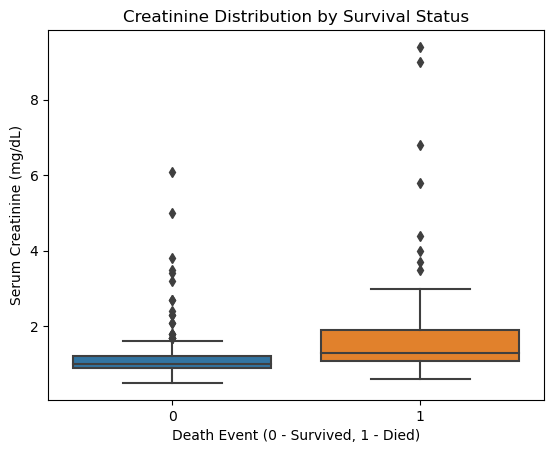

In [69]:
sns.boxplot(
    x="DEATH_EVENT",  # Group by Death Event
    y="serum_creatinine",  # Value to plot on y-axis
    data=df,  # Data source
)

# Customize the plot (optional)
plt.xlabel("Death Event (0 - Survived, 1 - Died)")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.title("Creatinine Distribution by Survival Status")
plt.show()